<a href="https://colab.research.google.com/github/Kamilya2020/Classification/blob/main/Convolutional_Neural_Network_for_COVID_19_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/data.zip # Décompresser votre base de données à partir du Drive

Archive:  /content/drive/MyDrive/data.zip
   creating: data/
   creating: data/TEST/
  inflating: data/TEST/COVID-19.jpeg  
  inflating: data/TEST/Healthy.jpeg  
   creating: data/TRAIN/
   creating: data/TRAIN/COVID-19/
  inflating: data/TRAIN/COVID-19/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: data/TRAIN/COVID-19/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: data/TRAIN/COVID-19/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: data/TRAIN/COVID-19/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: data/TRAIN/COVID-19/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: data/TRAIN/COVID-19/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: data/TRAIN/COVID-19/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: data/TRAIN/COVID-19/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: data/TRAIN/COVID-19/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_corona

In [8]:
import os
print('total Validation COVID-19 images:', len(os.listdir('data/VAL/COVID-19')))
print('total Validation Healthy images:', len(os.listdir('data/VAL/Healthy')))

print('total Training COVID-19 images:', len(os.listdir('data/TRAIN/COVID-19')))
print('total Training Healthy images:', len(os.listdir('data/TRAIN/Healthy')))

total Validation COVID-19 images: 5
total Validation Healthy images: 5
total Training COVID-19 images: 20
total Training Healthy images: 19


In [9]:
train_dir = '/content/data/TRAIN'
validation_dir = '/content/data/VAL'

In [10]:
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
model = Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      147520    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 193600)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')
Val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=2,
    class_mode='binary')
validation_generator = Val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=2,
    class_mode='binary')

Found 39 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [13]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_generator,epochs=25, validation_data=validation_generator, callbacks=callbacks_list)

Epoch 1/25
20/20 [==============================] - 11s 106ms/step - loss: 4.7463 - accuracy: 0.4103 - val_loss: 3.9916 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/25
20/20 [==============================] - 2s 79ms/step - loss: 3.4714 - accuracy: 0.5128 - val_loss: 2.9754 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/25
20/20 [==============================] - 2s 80ms/step - loss: 2.4544 - accuracy: 0.5128 - val_loss: 1.9966 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/25
20/20 [==============================] - 2s 87ms/step - loss: 1.4706 - accuracy: 0.5128 - val_loss: 1.1475 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/25
20/20 [==============================] - 2s 81ms/step - loss: 0.8796 - accuracy: 0.5128 - val_loss: 0.6997 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/25
20/20 [==============================] - 2s 80ms/step - loss: 0.7033 - accuracy: 0.4359 - val_loss: 0.6950 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/25
20/20 [==============================] - 2s 79ms/step - loss: 0

In [14]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
img_path='/content/data/TEST/COVID-19.jpeg'

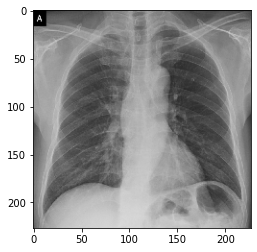

1/1 [==============================] - 0s 21ms/step
Predicted: [[0.48261026]] COVID-19


In [23]:
img = tf.keras.utils.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print('Predicted:', score, 'COVID-19' if score < 0.5 else 'Healthy')